# Figure 2

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

from flyvis import EnsembleView
from flyvis.utils import color_utils

In [2]:
ensemble = EnsembleView("flow/0000")

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2024-10-14 23:35:52] ensemble:166 Loaded 50 networks.


## b

Text(0.5, 1.0, 'Flash response indices')

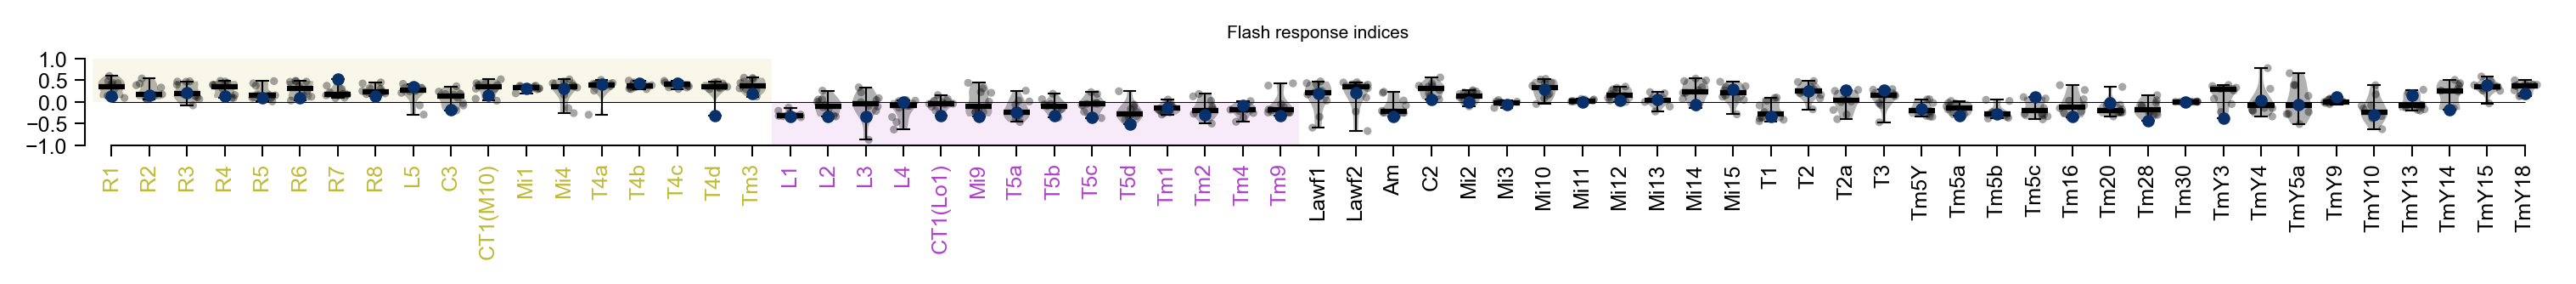

In [3]:
with ensemble.ratio(best=0.2):
    fig, ax = ensemble.flash_response_index()

ymin, ymax = 0, 1
# to get locations of left most and right most T4 subtype ticks
xmin, xmax = [
    p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["R1", "Tm3"]
]
# to place in between ticks
xmin -= 1 / 2
xmax += 1 / 2
xy = (xmin, ymin)
width = xmax - xmin
height = ymax
rect = Rectangle(xy, width, height, facecolor=color_utils.ON_FR, alpha=0.1)
ax.add_patch(rect)

ymin, ymax = 0, -1
# to get locations of left most and right most T4 subtype ticks
xmin, xmax = [
    p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["L1", "Tm9"]
]
# to place in between ticks
xmin -= 1 / 2
xmax += 1 / 2
xy = (xmin, ymin)
width = xmax - xmin
height = ymax
rect = Rectangle(xy, width, height, facecolor=color_utils.OFF_FR, alpha=0.1)
ax.add_patch(rect)

ax.set_title("Flash response indices")

## c

Text(0.5, 1.0, 'Direction selectivity indices')

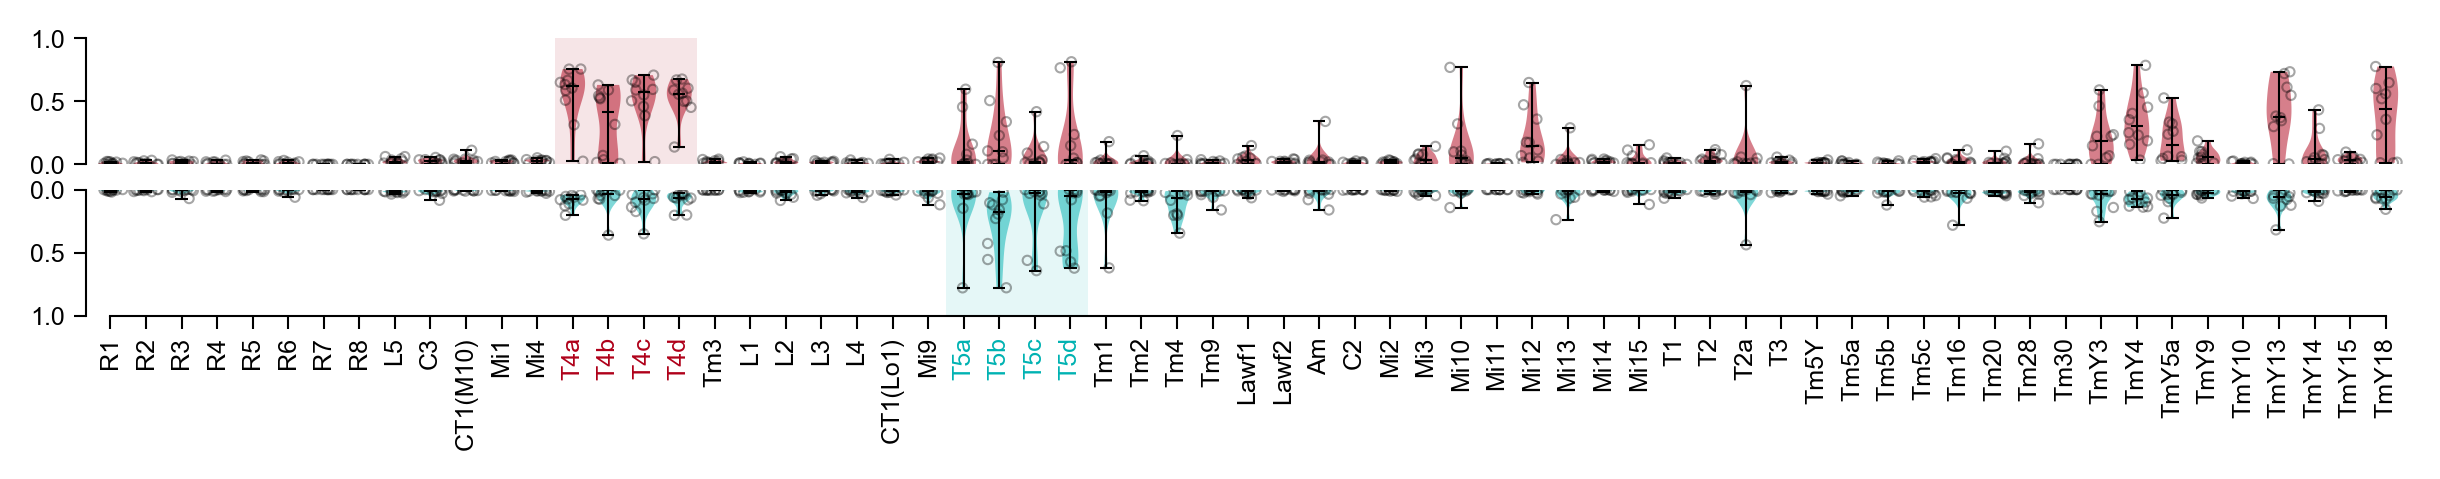

In [4]:
with ensemble.ratio(best=0.2):
    fig, axes = ensemble.direction_selectivity_index()

ymin, ymax = 0, 1
# to get locations of left most and right most T4 subtype ticks
xmin, xmax = [
    p.get_position()[0]
    for p in axes[1].get_xticklabels()
    if p.get_text() in ["T4a", "T4d"]
]
# to place in between ticks
xmin -= 1 / 2
xmax += 1 / 2
xy = (xmin, ymin)
width = xmax - xmin
height = ymax
rect = Rectangle(xy, width, height, facecolor=color_utils.ON, alpha=0.1)
axes[0].add_patch(rect)

# to get locations of left most and right most T4 subtype ticks
xmin, xmax = [
    p.get_position()[0]
    for p in axes[1].get_xticklabels()
    if p.get_text() in ["T5a", "T5d"]
]
# to place in between ticks
xmin -= 1 / 2
xmax += 1 / 2
xy = (xmin, ymin)
width = xmax - xmin
height = ymax
rect = Rectangle(xy, width, height, facecolor=color_utils.OFF, alpha=0.1)
axes[1].add_patch(rect)

ax.set_title("Direction selectivity indices")

## d

In [5]:
from flyvis.analysis.flash_responses import (
    flash_response_index,
    fri_correlation_to_known,
)
from flyvis.analysis.moving_bar_responses import (
    direction_selectivity_index,
    dsi_correlation_to_known,
    correlation_to_known_tuning_curves,
    preferred_direction,
    angular_distance_to_known,
)

In [6]:
with ensemble.ratio(best=0.2):
    print(ensemble.names)
    fris = flash_response_index(ensemble.flash_responses(), radius=6)
    fri_corr = fri_correlation_to_known(fris)

['flow/0000/000', 'flow/0000/001', 'flow/0000/002', 'flow/0000/003', 'flow/0000/004', 'flow/0000/005', 'flow/0000/006', 'flow/0000/007', 'flow/0000/008', 'flow/0000/009']


In [7]:
with ensemble.ratio(best=0.2):
    stims_and_resps_moving_edges = ensemble.moving_edge_responses()

    # TODO: fix this, does not come out as expected
    dsi_corr = dsi_correlation_to_known(
        direction_selectivity_index(stims_and_resps_moving_edges)
    )
    tuning_corrs = correlation_to_known_tuning_curves(stims_and_resps_moving_edges)
    t4_corrs = (
        tuning_corrs.custom.where(cell_type=["T4a", "T4b", "T4c", "T4d"], intensity=1)
        .median("neuron")
        .squeeze()
    )
    t5_corrs = (
        tuning_corrs.custom.where(cell_type=["T5a", "T5b", "T5c", "T5d"], intensity=0)
        .median("neuron")
        .squeeze()
    )

In [8]:
pds = preferred_direction(stims_and_resps_moving_edges)
pd_distances = angular_distance_to_known(pds)

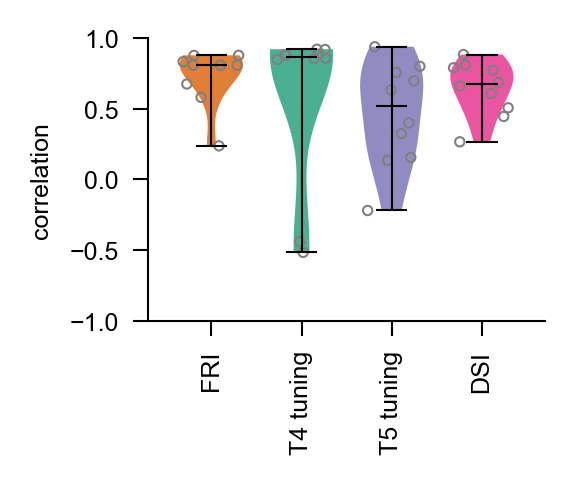

In [9]:
from flyvis.analysis.visualization.plots import violin_groups

fig, ax, *_ = violin_groups(
    np.stack(
        [
            fri_corr.squeeze(),
            t4_corrs.values,
            t5_corrs.values,
            dsi_corr.values,
        ],
        axis=0,
    )[:, None, :],
    ["FRI", "T4 tuning", "T5 tuning", "DSI"],
    ylabel="correlation",
    figsize=(1.8, 1.5),
    ylim=(-1, 1),
    colors=[
        plt.get_cmap("Dark2")(0.125),
        plt.get_cmap("Dark2")(0),
        plt.get_cmap("Dark2")(0.25),
        plt.get_cmap("Dark2")(0.375),
    ],
    color_by="experiments",
    scatter_edge_color="gray",
    scatter_radius=5,
    violin_alpha=0.8,
)

(3.241592653589793, -0.1)

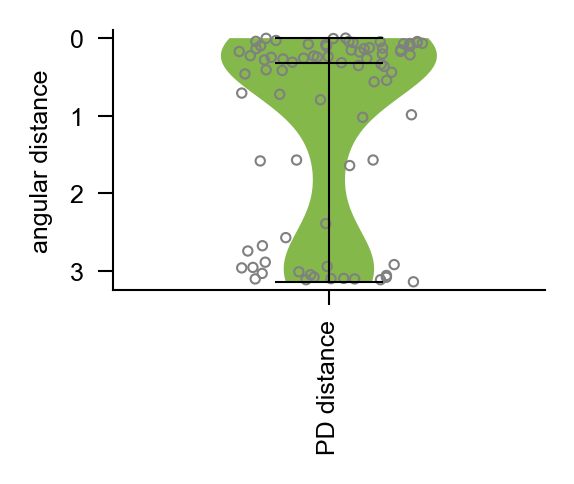

In [10]:
fig, ax, *_ = violin_groups(
    pd_distances.values.flatten()[None, None, :],
    ["PD distance"],
    ylabel="angular distance",
    figsize=(1.8, 1.5),
    ylim=(-1, 1),
    colors=[
        plt.get_cmap("Dark2")(0.5),
    ],
    color_by="experiments",
    scatter_edge_color="gray",
    scatter_radius=5,
    violin_alpha=0.8,
)
ax.set_ylim(
    np.pi + 0.1,
    -0.1,
)